# Pandas

## Pandas Series
A Pandas Series is like a column in a table. It is a one-dimensional array holding data of any type.

In [92]:
import numpy as np
import pandas as pd

## Series from List

In [93]:
country = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives']
pd.Series(country)

0         India
1      Pakistan
2    Bangladesh
3     Sri Lanka
4         Nepal
5        Bhutan
6      Maldives
dtype: object

In [94]:
runs = [51,45,67,12,34,0,98]
runs_ser = pd.Series(runs)

In [95]:
marks = [45,67,89,90,34,56,78]
subjects = ['Maths', 'Statistics','Social Science', 'Computer', 'Physics', 'Chemistry', 'Biology']
pd.Series(marks,index=subjects)

Maths             45
Statistics        67
Social Science    89
Computer          90
Physics           34
Chemistry         56
Biology           78
dtype: int64

name attribute in the series.

In [96]:
marks = pd.Series(marks,index=subjects, name="Marks of Zubair")
marks

Maths             45
Statistics        67
Social Science    89
Computer          90
Physics           34
Chemistry         56
Biology           78
Name: Marks of Zubair, dtype: int64

## Series from dictionary

In [97]:
dict_marks = {
    'Maths': 45,
    'Statistics': 67,
    'Social Science': 89,
    'Computer': 90,
    'Physics': 34,
    'Chemistry': 56,
    'Biology': 78
}
marks = pd.Series(dict_marks, name="Marks using dict")


## Series Attributes

In [98]:
# size
print("size =",marks.size)

# dtype
print("dtype =",marks.dtype)

# name
print("name =",marks.name)

# is_unique
print("is_unique (marks) =",marks.is_unique)
print("is_unique (runs) =",pd.Series([1,2,3,4,4,5]).is_unique)

# index
print("index (marks) =",marks.index)
print("index (runs) =",runs_ser.index)

# values
print("values =",marks.values)
print("values are numpy array =",type(marks.values))

size = 7
dtype = int64
name = Marks using dict
is_unique (marks) = True
is_unique (runs) = False
index (marks) = Index(['Maths', 'Statistics', 'Social Science', 'Computer', 'Physics',
       'Chemistry', 'Biology'],
      dtype='object')
index (runs) = RangeIndex(start=0, stop=7, step=1)
values = [45 67 89 90 34 56 78]
values are numpy array = <class 'numpy.ndarray'>


## Series using read_csv

In [99]:
# with one col
df = pd.read_csv('pandas01_subs.csv')
subs = df.squeeze()
subs
# without squeeze it will be a dataframe. with squeeze it will be a series


0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [100]:
# with two cols
kohli_runs = pd.read_csv("pandas01_kohli_ipl.csv", index_col='match_no').squeeze()
kohli_runs

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [101]:
movies = pd.read_csv('pandas01_bollywood.csv', index_col='movie').squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Series Methods

In [102]:
# head and tail
print("head -----------------")
print(movies.head(3))
print("tail -----------------")
print(movies.tail())


head -----------------
movie
Uri: The Surgical Strike                Vicky Kaushal
Battalion 609                             Vicky Ahuja
The Accidental Prime Minister (film)      Anupam Kher
Name: lead, dtype: object
tail -----------------
movie
Hum Tumhare Hain Sanam      Shah Rukh Khan
Aankhen (2002 film)       Amitabh Bachchan
Saathiya (film)               Vivek Oberoi
Company (film)                  Ajay Devgn
Awara Paagal Deewana          Akshay Kumar
Name: lead, dtype: object


In [103]:
# sample ; gives random rows
movies.sample(4)   # gives `one` random row by default

movie
Gabbar Is Back                Akshay Kumar
Zameer: The Fire Within         Ajay Devgn
Strings of Passion             Zeenat Aman
Lucky Kabootar             Arvinder Bhatti
Name: lead, dtype: object

In [104]:
# value_counts ; gives frequency of each value
movies.value_counts()    # tells how many movies each actor(value) has done
# In other words, how many times each value has occured or frequency of each value

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [105]:
# sort_values
sorted_runs = kohli_runs.sort_values(ascending=False)    # sorting does not change original series
print(sorted_runs.head(1))
print(sorted_runs.head(1).values[0])


match_no
128    113
Name: runs, dtype: int64
113


In [106]:
# inplace
new_runs = kohli_runs.copy()    # to avoid warning
new_runs.sort_values(inplace=True)    # inplace=True will change the original series
new_runs

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

In [107]:
# sort_index
movies.sort_index()  # sorts by index

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

## Series Maths Methods

In [108]:
# count
print("Number of non-null values in movies =",movies.count())  # count of non-null values, while size gives count of all values including null

Number of non-null values in movies = 1500


In [109]:
# sum
print("Total Runs by Kohli =",kohli_runs.sum())

Total Runs by Kohli = 6634


In [110]:
# product 
print("Product of all marks =",marks.product())

Product of all marks = 3586587076800


In [111]:
# mean, median, mode, std, var
print("Mean of runs =",kohli_runs.mean())
print("Median of runs =",kohli_runs.median())
print("Mode of runs =",kohli_runs.mode())
print("Standard Deviation of runs =",kohli_runs.std())
print("Variance of runs =",kohli_runs.var())


Mean of runs = 30.855813953488372
Median of runs = 24.0
Mode of runs = 0    0
Name: runs, dtype: int64
Standard Deviation of runs = 26.22980132830278
Variance of runs = 688.0024777222343


In [112]:
# min, max
print("Minimum runs =",subs.min())
print("Maximum runs =",subs.max())

Minimum runs = 33
Maximum runs = 396


In [113]:
# describe
kohli_runs.describe()

count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64

## Series Indexing

In [114]:
# integer indexing
x= pd.Series([12,13,14,35,46,57,58,79,9])
x[0]

12

In [115]:
# negative indexing, confusing
# x[-1]   # negative indexing is not allowed in pandas series
marks[-1]  

C:\Users\Zubair\AppData\Local\Temp\ipykernel_15324\2880226713.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marks[-1]


78

In [116]:
# label indexing, mostly used
print(movies[0])
print(movies['Uri: The Surgical Strike'])

Vicky Kaushal
Vicky Kaushal


C:\Users\Zubair\AppData\Local\Temp\ipykernel_15324\3913934673.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(movies[0])


In [117]:
# slicing
print("Simple slicing",kohli_runs[4:25: 5])
print("------------------------------")
print("Label slicing",movies['Uri: The Surgical Strike':'Kabir Singh': 5])
print("------------------------------")
print("Negative slicing", kohli_runs[-5:])

Simple slicing match_no
5      1
10     3
15    50
20    15
25     7
Name: runs, dtype: int64
------------------------------
Label slicing movie
Uri: The Surgical Strike            Vicky Kaushal
Soni (film)                  Geetika Vidya Ohlyan
Amavas                                  Ali Asgar
Badla (2019 film)                Amitabh Bachchan
Mere Pyare Prime Minister           Rasika Agashe
Gone Kesh                            Deepika Amin
Student of the Year 2                Tiger Shroff
Khamoshi (2019 film)                  Prabhu Deva
Name: lead, dtype: object
------------------------------
Negative slicing match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64


In [118]:
# fancy indexing
print(kohli_runs[[2,5,4,6,8]])     # gives values at index 2,5,4,6,8, numpy style indexing
print("------------------------------")
print(movies[['Uri: The Surgical Strike','Zinda (film)']])

match_no
2    23
5     1
4    12
6     9
8     0
Name: runs, dtype: int64
------------------------------
movie
Uri: The Surgical Strike    Vicky Kaushal
Zinda (film)                  Sanjay Dutt
Name: lead, dtype: object


## Editing Series

In [119]:
# using indexing
marks["Chemistry"] = 67
marks

Maths             45
Statistics        67
Social Science    89
Computer          90
Physics           34
Chemistry         67
Biology           78
Name: Marks using dict, dtype: int64

In [120]:
# If the index does not exist, it will add a new item just like a dictionary
marks["History"] = 56
marks

Maths             45
Statistics        67
Social Science    89
Computer          90
Physics           34
Chemistry         67
Biology           78
History           56
Name: Marks using dict, dtype: int64

In [121]:
# slicing
runs_ser[3:6] = 33      # change from 3 to 5
runs_ser

0    51
1    45
2    67
3    33
4    33
5    33
6    98
dtype: int64

In [122]:
# fancy indexing
runs_ser[[2,4,6]] = [55,66,77]
runs_ser

0    51
1    45
2    55
3    33
4    66
5    33
6    77
dtype: int64

## Series with Python Functionalities

In [123]:
# len/type/dir/sorted/max/min
print("len =",len(subs))
print("type =",type(subs))
print("dir =",dir(subs))
print("sorted =",sorted(subs))      # returns a list just like sorted() function used to do
print("max =",max(subs))
print("min =",min(subs))

len = 365
type = <class 'pandas.core.series.Series'>
dir = ['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rd

In [124]:
# type conversion
print("List version =",list(marks))
print("Numpy version =",np.array(marks))
print("Dictionary version =",dict(marks))

List version = [45, 67, 89, 90, 34, 67, 78, 56]
Numpy version = [45 67 89 90 34 67 78 56]
Dictionary version = {'Maths': 45, 'Statistics': 67, 'Social Science': 89, 'Computer': 90, 'Physics': 34, 'Chemistry': 67, 'Biology': 78, 'History': 56}


In [125]:
# membership operator
print("Physics" in marks)       # checks in index
print(67 in marks.values)       # checks in values

True
True


In [126]:
# looping
for i in marks:     # by default it will loop over values
    print("val =",i)
print("------------------------------")
for i in marks.index:   # loop over index
    print("index =",i)

val = 45
val = 67
val = 89
val = 90
val = 34
val = 67
val = 78
val = 56
------------------------------
index = Maths
index = Statistics
index = Social Science
index = Computer
index = Physics
index = Chemistry
index = Biology
index = History


In [127]:
# Arithmetic operations (Broadcasting) ; element wise operations
100 - marks

Maths             55
Statistics        33
Social Science    11
Computer          10
Physics           66
Chemistry         33
Biology           22
History           44
Name: Marks using dict, dtype: int64

In [128]:
# Comparison operators
kohli_runs >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

## Boolean Indexing in Series

In [129]:
# Kolhi's 50+ scores
print("Kohli's 50+ scores =",kohli_runs[kohli_runs >= 50].size)
kohli_runs[kohli_runs >= 50]

Kohli's 50+ scores = 50


match_no
15      50
34      58
41      71
44      56
45      67
52      70
57      57
68      73
71      51
73      58
74      65
80      57
81      93
82      99
85      56
97      67
99      73
103     51
104     62
110     82
116     75
117     79
119     80
120    100
122     52
123    108
126    109
127     75
128    113
129     54
131     54
132     62
134     64
137     55
141     58
144     57
145     92
148     68
152     70
160     84
162     67
164    100
175     72
178     90
182     50
188     72
197     51
198     53
209     58
213     73
Name: runs, dtype: int64

In [130]:
# Number of ducks by Kohli
print("Number of ducks by Kohli =",kohli_runs[kohli_runs == 0].size)
kohli_runs[kohli_runs == 0]

Number of ducks by Kohli = 9


match_no
8      0
87     0
91     0
93     0
130    0
135    0
206    0
207    0
211    0
Name: runs, dtype: int64

In [131]:
# Find actors who have done more than 30 movies
num_movies = movies.value_counts()
num_movies[num_movies > 30]


lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Name: count, dtype: int64

## Plotting in Series

<Axes: >

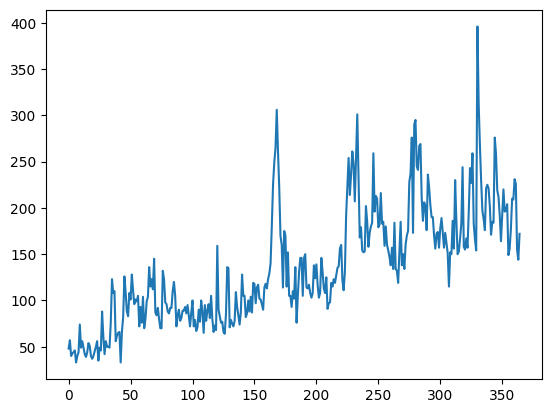

In [132]:
subs.plot()

<Axes: ylabel='count'>

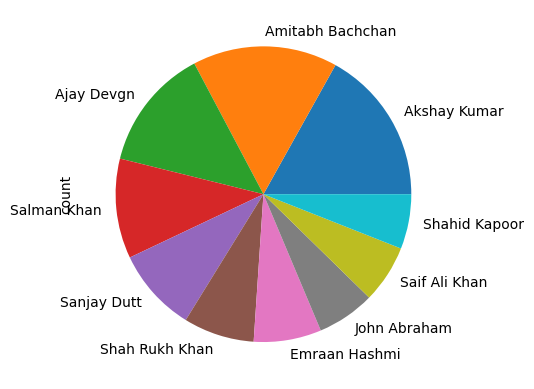

In [133]:
# movies.value_counts().head(10).plot(kind='bar')
movies.value_counts().head(10).plot(kind='pie')


## Copy vs View
Copy creates a new copy of the data, while view is just a view of the original data. If you change the view, the original data will change. If you change the copy, the original data will not change.

In [134]:
# Copy and View
# Copy
runs_copy = runs_ser.copy()
runs_copy[0] = 100
print("Original =",runs_ser[0])
print("Copy =",runs_copy[0])

# View
runs_view = runs_ser.view()
runs_view[0] = 100
print("Original =",runs_ser[0])
print("View =",runs_view[0])

Original = 51
Copy = 100
Original = 100
View = 100


C:\Users\Zubair\AppData\Local\Temp\ipykernel_15324\871960376.py:9: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  runs_view = runs_ser.view()


In [135]:
runs_ser

0    100
1     45
2     55
3     33
4     66
5     33
6     77
dtype: int64

## Important Series Methods
agg  
astype  
between  
clip  
drop_duplicates  
dropna  
fillna  
filter  
iloc  
loc  
isnull  
map  


In [137]:
# agg ; The agg() method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis.
print("Sum =",runs_ser.agg('sum'))
print("Mean =",runs_ser.agg('mean'))
def square(x):
    return x*x
print("Square =",runs_ser.agg(square))

Sum = 409
Mean = 58.42857142857143
Square = 0    10000
1     2025
2     3025
3     1089
4     4356
5     1089
6     5929
dtype: int64


C:\Users\Zubair\AppData\Local\Temp\ipykernel_15324\3372455948.py:6: FutureWarning: using <function square at 0x000001E3BBC8D300> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  print("Square =",runs_ser.agg(square))


In [138]:
# astype ; The astype() function is used to cast a pandas object to a specified dtype.
print(runs_ser.astype('float'))
print(runs_ser.astype('str'))


0    100.0
1     45.0
2     55.0
3     33.0
4     66.0
5     33.0
6     77.0
dtype: float64
0    100
1     45
2     55
3     33
4     66
5     33
6     77
dtype: object


In [141]:
# between ; The between() function is used to get boolean DataFrame showing whether each element in the DataFrame/Series is between the values in lower and upper.
print(runs_ser.between(30,50))
print("--------------------")
runs_ser[runs_ser.between(30,50)]

0    False
1     True
2    False
3     True
4    False
5     True
6    False
dtype: bool
--------------------


1    45
3    33
5    33
dtype: int64

In [142]:
# clip ; The clip() function is used to trim values at input threshold(s).
# For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
print(runs_ser.clip(30,50))

0    50
1    45
2    50
3    33
4    50
5    33
6    50
dtype: int64


In [143]:
# drop_duplicates ; The drop_duplicates() function is used to remove duplicate values from the Series.
kohli_runs.drop_duplicates()

match_no
1       1
2      23
3      13
4      12
6       9
       ..
173    29
175    72
176    43
178    90
198    53
Name: runs, Length: 78, dtype: int64

In [145]:
# dropna ; The dropna() function is used to remove missing values.
x = pd.Series([1,2,np.nan,4,5,np.nan])
x.dropna()

0    1.0
1    2.0
3    4.0
4    5.0
dtype: float64

In [146]:
# fillna ; The fillna() function is used to fill NA/NaN values using the specified method.
x.fillna(0)

0    1.0
1    2.0
2    0.0
3    4.0
4    5.0
5    0.0
dtype: float64

In [148]:
# filter ; The filter() function is used to Subset rows or columns of dataframe according to labels in the specified index.
# Note that this routine does not filter a dataframe on its contents. The filter is applied to the labels of the index.
movies.filter(like='Za', axis=0)

movie
Shaadi Mein Zaroor Aana            Rajkummar Rao
Dilliwali Zaalim Girlfriend            Ira Dubey
Aa Dekhen Zara                 Neil Nitin Mukesh
Kudiyon Ka Hai Zamana                      Rekha
Taare Zameen Par                 Darsheel Safary
Zamaanat                               Jeetendra
Darna Zaroori Hai               Amitabh Bachchan
Veer-Zaara                        Shah Rukh Khan
Zameer: The Fire Within               Ajay Devgn
Zameen (2003 film)                    Ajay Devgn
Name: lead, dtype: object

In [155]:
# iloc ; The iloc() function is used to get integer-location based indexing for selection by position.
print(kohli_runs.iloc[1])     # it gives value according to programming indexing of lists, tuples etc

23


In [156]:
# loc ; The loc() function is used to access a group of rows and columns by labels or a boolean array.
print(kohli_runs.loc[1])    # it gives the values according to indexing of the series


1


In [159]:
# isnull ; The isnull() function is used to detect missing values.
x[~x.isnull()]

0    1.0
1    2.0
3    4.0
4    5.0
dtype: float64

In [160]:
# map ; The map() function is used to map values of Series according to input correspondence.
print(kohli_runs.map(lambda x: x+10))

match_no
1      11
2      33
3      23
4      22
5      11
       ..
211    10
212    30
213    83
214    35
215    17
Name: runs, Length: 215, dtype: int64
